<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-6/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA: Assignment 6B

Purpose of this exercise is to get familiar with the Keras functional API and different convolutions e.g. Separable Convolution, Depthwise Convolution and Grouped Convolution. I have used 6A as base to understand and converted it to functional API step by step.

### Import Libraries and modules

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.layers import Input, Conv2D, AveragePooling2D, merge, concatenate, SeparableConv2D, DepthwiseConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Get the dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

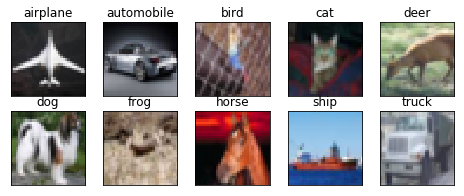

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Define method to plot model history curve after it is trained

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Define method to get validation accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Convert the pixel values to 0,1 and outputs to categorical so that it is easier to train.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Create the model

This is the model that we need to improve.

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Notice the number of parameters in dense layers. The two layers contribute to about 40 % of the total parameters.

### Train for 100 epochs

Create a image data generator and start training the model. After training is over plot the history curve and note down the accuracy.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 21s 54ms/step - loss: 1.8661 - acc: 0.2805 - val_loss: 1.4259 - val_acc: 0.4647
Epoch 2/100
390/390 [==============================] - 20s 51ms/step - loss: 1.3834 - acc: 0.4992 - val_loss: 1.1972 - val_acc: 0.5726
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1741 - acc: 0.5787 - val_loss: 1.0371 - val_acc: 0.6314
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 1.0356 - acc: 0.6336 - val_loss: 0.8875 - val_acc: 0.6883
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9364 - acc: 0.6719 - val_loss: 0.8176 - val_acc: 0.7193
Epoch 6/100
390/390 [==============================] - 20s 51ms/step - loss: 0.8539 - acc: 0.7010 - val_loss: 0.7483 - val_acc: 0.7417
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7931 - acc: 0.7245 - val_loss: 0.7403 - val_acc: 0.7513
Epoch 8/100
390/390 [==============================] - 

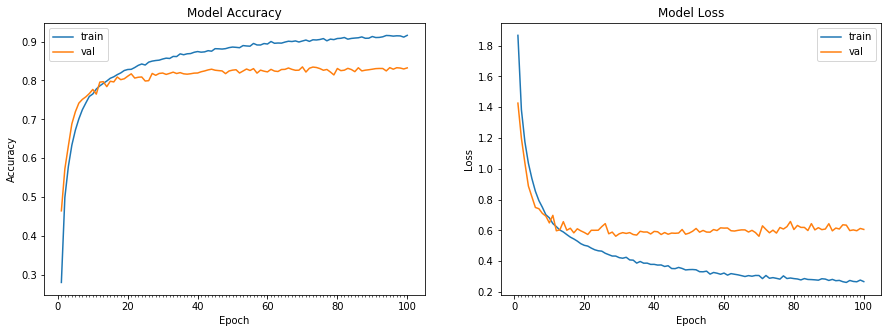

Accuracy on test data is: 83.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Required Model using different convolutions and functional API

Spatially separable convolution is implemented using 1x3 and 3x1 convolutions in sequence.

For depthwise separable convolutions SeperableConv2D convolution is used.

Group convolutions are implemented using same input from the last layer and then concatenating their output.

In [7]:
dropout_rate = 0.2
# Define the model

input = Input(shape=(32, 32, 3,))
layer_1 = Conv2D(32, (3,3), name='layer1')(input)#30, 30

relu_1 = Activation('relu', name='relu_1')(layer_1)
layer_2 = Conv2D(64, (3,3), name='layer_2')(relu_1)#28, 28
layer_2 = Dropout(dropout_rate)(layer_2)

relu_2 = Activation('relu', name='relu_2')(layer_2)
# Spatially separable convolution
layer_3_1 = Conv2D(128, (1,3), name='layer_3_1')(relu_2)
layer_3 = Conv2D(128, (3,1), name='layer_3')(layer_3_1)#26, 26
layer_3 = Dropout(dropout_rate)(layer_3)

relu_3 = Activation('relu', name='relu_3')(layer_3)
avg_pooling_1 = AveragePooling2D(pool_size=(2,2))(relu_3) #13, 13
relu_4 = Activation('relu', name='relu_4')(avg_pooling_1)
layer_5 = Conv2D(32, (1,1), name='layer_5')(relu_4)
layer_5 = Dropout(dropout_rate)(layer_5)

relu_5 = Activation('relu', name='relu_5')(layer_5)
# Depthwise separable convolution
layer_6 = SeparableConv2D(64, (3,3), name='layer_6')(relu_5)#11, 11
layer_6 = Dropout(dropout_rate)(layer_6)

relu_6 = Activation('relu', name='relu_6')(layer_6)
layer_7_group3 = Conv2D(128, (3,3), padding='same', name='layer_7_group3')(relu_6)#9, 11
relu_7_3 = Activation('relu', name='relu_7_3')(layer_7_group3)
layer_7_group5 = Conv2D(128, (5,5), padding='same', name='layer_7_group5')(relu_6)#7, 11
relu_7_5 = Activation('relu', name='relu_7_5')(layer_7_group5)
layer_7 = concatenate([relu_7_3,relu_7_5], name='layer_7_concat')
layer_7 = Dropout(dropout_rate)(layer_7)

relu_7 = Activation('relu', name='relu_7')(layer_7)
layer_8_group1 = Conv2D(256, (3,3), dilation_rate=1, padding='same', name='layer_8_group1')(relu_7)#(7, 11), (5, 11)
relu_8_1 = Activation('relu', name='relu_8_1')(layer_8_group1)
layer_8_group2 = Conv2D(128, (5,5), dilation_rate=2, padding='same', name='layer_8_group2')(relu_7)#(5, 11), (3, 11)
relu_8_2 = Activation('relu', name='relu_8_2')(layer_8_group2)
layer_8 = concatenate([relu_8_1,relu_8_2], name='layer_8_concat')
layer_8 = Dropout(dropout_rate)(layer_8)

relu_8 = Activation('relu', name='relu_8')(layer_8)
layer_9 = Conv2D(32, (1,1))(relu_8)
layer_9 = Dropout(dropout_rate)(layer_9)


relu_9 = Activation('relu', name='relu_9')(layer_9)
layer_10 = Conv2D(10, (11,11))(relu_9)

flat = Flatten()(layer_10)
output = Activation('softmax', name='output')(flat)

model = Model(inputs=[input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0614 07:11:44.978587 140649033963392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 07:11:44.993139 140649033963392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 07:11:44.996143 140649033963392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 07:11:45.022725 140649033963392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0614 07:11:45.032189 

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
layer1 (Conv2D)                 (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
relu_1 (Activation)             (None, 30, 30, 32)   0           layer1[0][0]                     
__________________________________________________________________________________________________
layer_2 (Conv2D)                (None, 28, 28, 64)   18496       relu_1[0][0]                     
__________________________________________________________________________________________________
dropout_1 

### Visualise the model

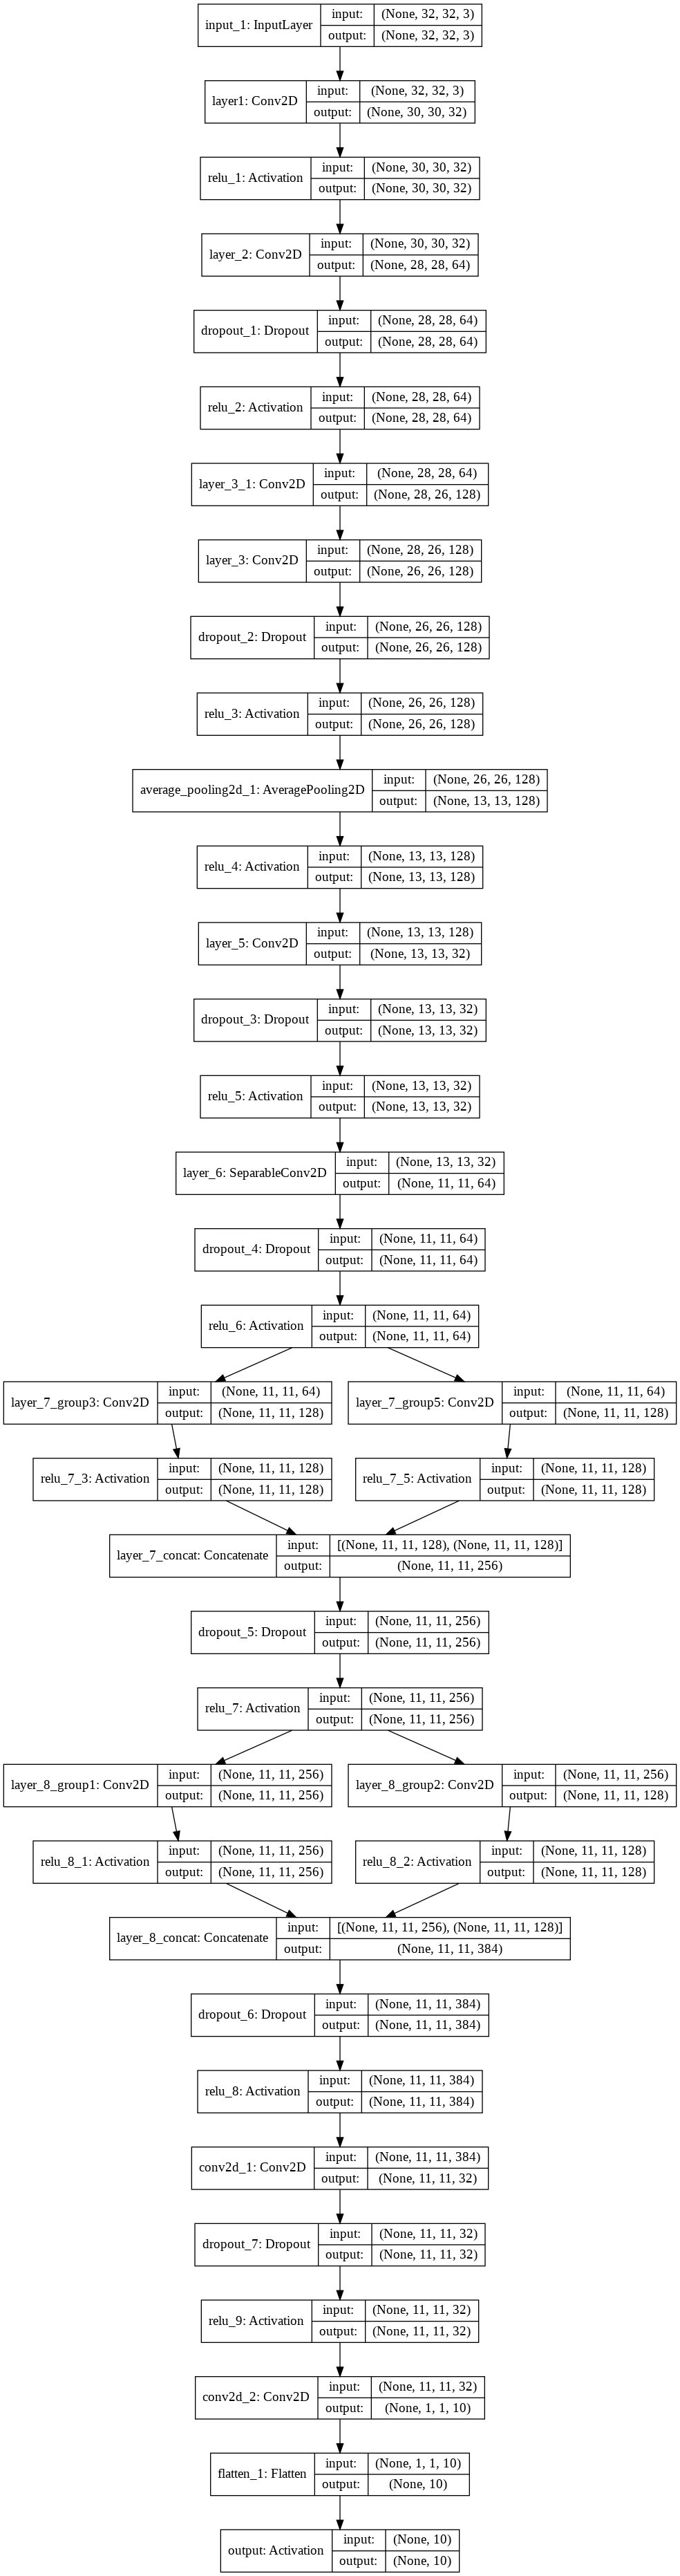

In [9]:
from IPython.display import Image
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_plot.png')

### Start training

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 33s 85ms/step - loss: 1.7287 - acc: 0.3580 - val_loss: 1.4776 - val_acc: 0.4692
Epoch 2/50
390/390 [==============================] - 33s 84ms/step - loss: 1.3295 - acc: 0.5197 - val_loss: 1.1922 - val_acc: 0.5751
Epoch 3/50
390/390 [==============================] - 33s 86ms/step - loss: 1.1410 - acc: 0.5958 - val_loss: 1.0328 - val_acc: 0.6317
Epoch 4/50
390/390 [==============================] - 34s 86ms/step - loss: 0.9985 - acc: 0.6479 - val_loss: 0.9564 - val_acc: 0.6665
Epoch 5/50
390/390 [==============================] - 33s 86ms/step - loss: 0.9070 - acc: 0.6813 - val_loss: 0.9123 - val_acc: 0.6817
Epoch 6/50
390/390 [==============================] - 34s 86ms/step - loss: 0.8251 - acc: 0.7100 - val_loss: 0.8977 - val_acc: 0.6917
Epoch 7/50
390/390 [==============================] - 34s 86ms/step - loss: 0.7562 - acc: 0.7342 - val_loss: 0.8148 - val_acc: 0.7188
Epoch 8/50
390/390 [==============================] - 34s 86ms

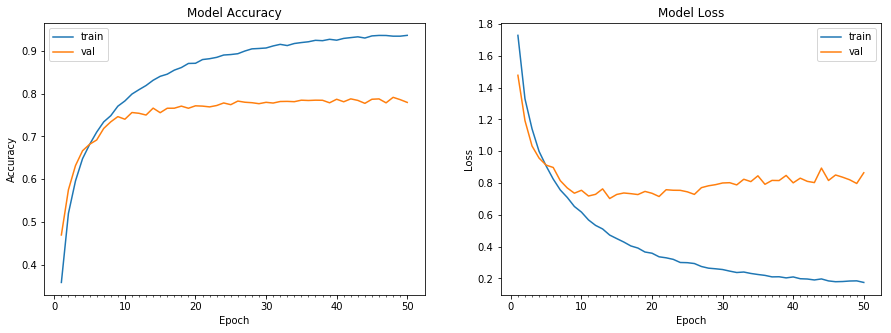

Accuracy on test data is: 77.98


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))